# Observed Trends
    1) CNN has the aggregate compound score closest to zero, meaning that CNN's tweets are the most neutral in this dataset.
    2) Both BBC and NY Times have negative 'compound sentiment' values over their last 100 tweets. BBC is substantially more negative than NY Times.
    3) According to Vader sentiment analysis CBS has the most positive 'compound sentiment' over their previous 100 tweets. 

In [1]:
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = 'ytaFff5GreJqZQnCDhmTczdI1'
consumer_secret = 'olqlg3rsfxjVWzZTZde230tYVFERyn2lAAWKEE5UdcZZbGDA3m'
access_token = '409702063-6bA8HGdezt26yWT1aNdvSzUeBZzZylSJaRo61jWi'
access_token_secret = 'r7OSRnVBs0K60WPX5dZGfrNxbN1EJQtZdaWPqlEQorGuz'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

target_users = ['@BBCWorld', '@CBS', '@CNN', '@FoxNews', '@nytimes']
all_user_list = []
all_timestamp_list = []
all_compound_list = []
all_pos_list = []
all_neu_list = []
all_neg_list = []
all_text_list = []
all_sentiment_list = []
all_tweets_ago_list = []

for target_user in target_users:
    user_list = []
    timestamp_list = []
    compound_list = []
    pos_list = []
    neu_list = []
    neg_list = []
    text_list = []
    tweets_ago_list = []
    tweet_count = 0
    
    for x in range(5):
        public_tweets = api.user_timeline(target_user, page=x)

        for tweet in public_tweets:
            timestamp = tweet["created_at"]
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            user_list.append(tweet["user"]["screen_name"])
            timestamp_list.append(timestamp)
            compound_list.append(compound)
            pos_list.append(pos)
            neu_list.append(neu)
            neg_list.append(neg)
            text_list.append(tweet["text"])
            tweet_count += 1
            tweets_ago_list.append(tweet_count)
    
            
    all_user_list.append(user_list)
    all_timestamp_list.append(timestamp_list)
    all_compound_list.append(compound_list)
    all_pos_list.append(pos_list)
    all_neu_list.append(neu_list)
    all_neg_list.append(neg_list)
    all_text_list.append(text_list)
    all_tweets_ago_list.append(tweets_ago_list)
            
        
    sentiments = np.mean(compound_list)
    all_sentiment_list.append(sentiments)

In [2]:
all_user_list = np.array(all_user_list).flatten().tolist()
all_timestamp_list = np.array(all_timestamp_list).flatten().tolist()
all_compound_list = np.array(all_compound_list).flatten().tolist()
all_pos_list = np.array(all_pos_list).flatten().tolist()
all_neu_list = np.array(all_neu_list).flatten().tolist()
all_neg_list = np.array(all_neg_list).flatten().tolist()
all_text_list = np.array(all_text_list).flatten().tolist()
all_tweets_ago_list = np.array(all_tweets_ago_list).flatten().tolist()

In [3]:
sentiment = {'User': all_user_list, 'Timestamp': all_timestamp_list, 'Compound_Score': all_compound_list, 'Pos_Score': all_pos_list, 'Neu_Score': all_neu_list, 'Neg_Score': all_neg_list, 'Tweets_Ago': all_tweets_ago_list, 'Tweet_Text': all_text_list}
sentiment_df = pd.DataFrame(sentiment)
sentiment_df.to_csv("Twitter_News_Outlet_Sentiment.csv", index=False, header=True)
sentiment_df

,Compound_Score,Neg_Score,Neu_Score,Pos_Score,Timestamp,Tweet_Text,Tweets_Ago,User
0,0.0000,0.000,1.000,0.000,Tue Jan 09 01:13:21 +0000 2018,Romania's changing face https://t.co/CVruZyesAm,1,BBCWorld
1,0.0000,0.000,1.000,0.000,Tue Jan 09 00:51:10 +0000 2018,Living with Brian's 'ghost' https://t.co/jToxb...,2,BBCWorld
2,-0.4215,0.237,0.763,0.000,Tue Jan 09 00:25:27 +0000 2018,Caruana Galizia case: Malta ex-corruption inve...,3,BBCWorld
3,-0.4767,0.256,0.744,0.000,Tue Jan 09 00:14:58 +0000 2018,US police chief 'kutecop4you' arrested in chil...,4,BBCWorld
4,-0.1280,0.209,0.620,0.171,Mon Jan 08 23:39:18 +0000 2018,Peru Pasamayo: Lorry driver admits causing dea...,5,BBCWorld
5,0.0000,0.000,1.000,0.000,Mon Jan 08 23:07:05 +0000 2018,Apple investigated by France for 'planned obso...,6,BBCWorld
6,0.0000,0.000,1.000,0.000,Mon Jan 08 23:07:05 +0000 2018,Gay marriage: Couple among first to wed in Aus...,7,BBCWorld
7,0.0000,0.000,1.000,0.000,Mon Jan 08 22:45:45 +0000 2018,Russia probe: Trump lawyers 'in talks over Mue...,8,BBCWorld
8,-0.5574,0.118,0.882,0.000,Mon Jan 08 22:31:10 +0000 2018,RT @BBCSport: Widnes Vikings' Kato Ottio has d...,9,BBCWorld
9,0.0000,0.000,1.000,0.000,Mon Jan 08 22:21:04 +0000 2018,North and South Korea to begin high-level talk...,10,BBCWorld


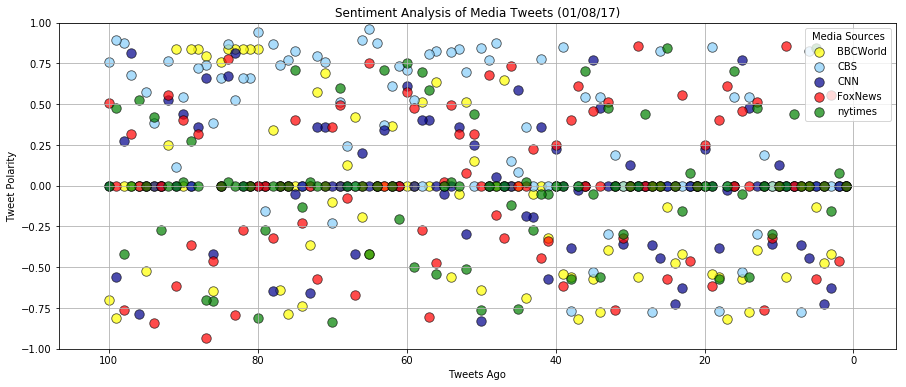

In [4]:
users = sentiment_df['User'].unique()
colors = ['yellow', 'lightskyblue', 'darkblue', 'red', 'green']

for i in range(len(users)):
    plt.scatter(x=sentiment_df[sentiment_df['User']==users[i]]['Tweets_Ago'].values,
                y=sentiment_df[sentiment_df['User']==users[i]]['Compound_Score'].values,
                s = 90,#*sentiment_df[sentiment_df['User']==users[i]]['Tweets_Ago'].values,
                c = colors[i], label = users[i],
                alpha = .7, edgecolor = 'black', linewidth = .8)

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (01/08/17)")
plt.legend(title="Media Sources", loc='upper right')
plt.grid()
plt.gcf().set_size_inches(15, 6)
plt.rcParams['axes.facecolor'] = 'gainsboro'
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.ylim(-1, 1)
plt.savefig("Sentiment_Analysis_Tweets.png")
plt.show()

In [5]:
avg_sentiment = {'User': target_users, 'Avg_Compound_Score': all_sentiment_list}
avg_sentiment_df = pd.DataFrame(avg_sentiment)
avg_sentiment_df

,Avg_Compound_Score,User
0,-0.052278,@BBCWorld
1,0.316011,@CBS
2,0.005508,@CNN
3,0.009119,@FoxNews
4,-0.001885,@nytimes


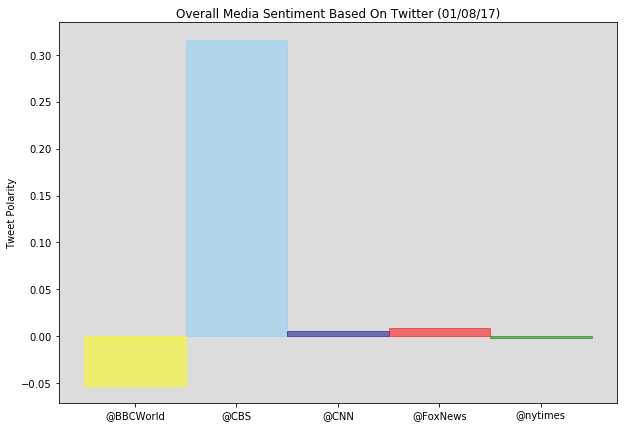

In [6]:
x_values = np.arange(len(avg_sentiment_df))
plt.figure(figsize=(10, 7))
barlist=plt.bar(x_values, avg_sentiment_df["Avg_Compound_Score"], alpha=0.5, align='center', width=1)
plt.xticks(x_values, avg_sentiment_df["User"], rotation="horizontal")
for i in range(len(barlist)):
    barlist[i].set_color(colors[i])
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based On Twitter (01/08/17)")
plt.savefig("Overall_Media_Sentiment.png")
plt.show()